In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
place_df = pd.read_csv('/home/abhimanyu/Desktop/ML_Project/placement-project-logistic-regression/placement.csv')

In [3]:
place_df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
place_df = place_df.iloc[:,1:]

In [5]:
place_df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# Feature Selection

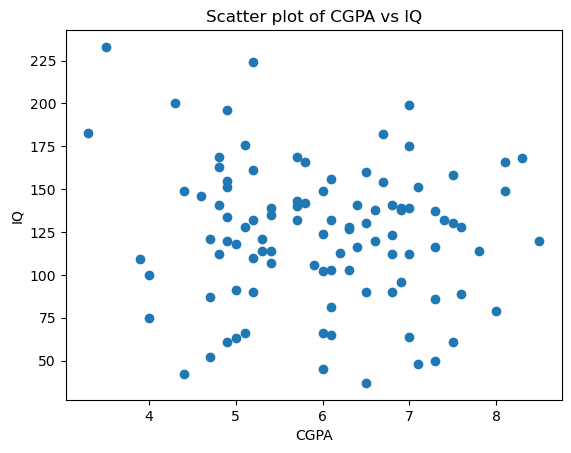

In [6]:
# Assuming df is your DataFrame containing 'cgpa' and 'iq' columns
plt.scatter(place_df['cgpa'], place_df['iq'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter plot of CGPA vs IQ')
plt.show()

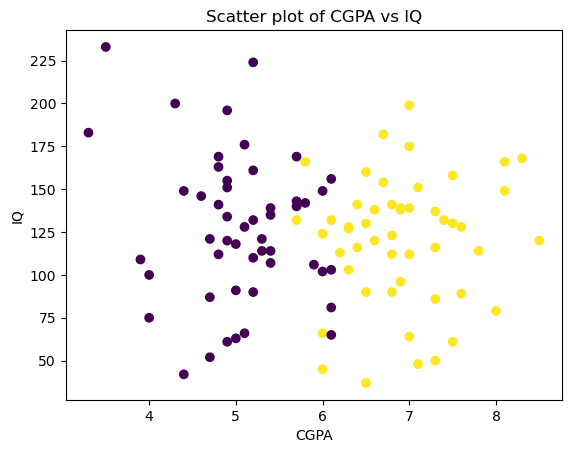

In [7]:
plt.scatter(place_df['cgpa'], place_df['iq'], c= place_df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter plot of CGPA vs IQ')
plt.show()

# Extract input and output cols

In [11]:
x = place_df.iloc[:,0:2]

In [12]:
y = place_df.iloc[:,-1]

In [13]:
print(x)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]


In [14]:
print(y)

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


# Train and Split

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.1)

In [17]:
x_train


,cgpa,iq
72,7.3,116.0
63,6.3,128.0
92,5.2,110.0
91,7.5,158.0
52,7.0,175.0
...,...,...
89,4.9,151.0
40,4.9,134.0
30,7.6,128.0
39,4.6,146.0


In [21]:
x_test 

,cgpa,iq
60,6.9,139.0
53,8.3,168.0
62,6.0,102.0
69,8.5,120.0
93,6.8,112.0
26,7.0,199.0
76,4.9,155.0
27,6.0,124.0
46,5.3,114.0
16,5.2,224.0


In [22]:
y_train


72    1
63    1
92    0
91    1
52    1
     ..
89    0
40    0
30    1
39    0
66    1
Name: placement, Length: 90, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

# Train model

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
#model training
clf.fit(x_train,y_train)

LogisticRegression()

# Evaluate the model/model selection

In [34]:
#find the accuracy
y_pred = clf.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9